In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

import matplotlib.pyplot as plt

In [80]:
n=50
n_important=3
X,y=make_classification(n_samples=1000, n_features=n, n_informative=n_important, n_redundant=n-n_important, n_classes=2, random_state=0)
df=pd.DataFrame(X)
rename_cols={col:'col_'+str(col) for col in df.columns}
df.rename(columns=rename_cols,inplace=True)
df['y']=y

In [37]:
df.y.mean()

0.498

In [87]:
km = KMeans(n_clusters=5)

In [88]:
km.fit(X)
df['cluster'] = km.predict(X)

In [40]:
def smooth_mean(T):
    def f(g):
        n= len(g)
        m=g.mean()
        return (m*n + 0.5*T)/(T+n)
    
    return f

<AxesSubplot:ylabel='Frequency'>

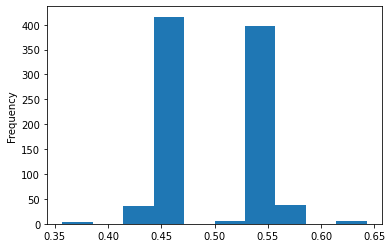

In [41]:
df.groupby('cluster')['y'].apply(smooth_mean(10)).plot(kind='hist')

In [115]:
model = XGBClassifier(n_estimators = 500, max_depth=10,n_jobs=-1, subsample=1)

In [98]:
df['te'] = df.groupby('cluster')['y'].transform(smooth_mean(1))

In [99]:
df[['te','y']].corr()

,te,y
te,1.000000,0.673414
y,0.673414,1.000000


In [117]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [75]:
lr = LogisticRegression()

In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['te']],df['y'], test_size=0.3)

In [123]:
model = DecisionTreeClassifier(max_depth=1000)

In [102]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [103]:
lr.score(xtrain,ytrain)

0.8028571428571428

In [106]:
df.groupby('cluster')['y'].count()

cluster
0    296
1    133
2    199
3    117
4    255
Name: y, dtype: int64

In [104]:
lr.score(xtest,ytest)

0.8033333333333333

In [125]:
df['n']=range(len(df))

In [128]:
X, y= df[['cluster']], df['y']

In [129]:
kf= KFold(5)

for idx, vidx in kf.split(X):
    xtrain, xtest = X.iloc[idx], X.iloc[vidx]
    ytrain, ytest = y.iloc[idx], y.iloc[vidx]

    model.fit(xtrain, ytrain)
    ac = model.score(xtest,ytest)
    ac_ = model.score(xtrain, ytrain)
    print(ac, ac_)

0.785 0.8075
0.795 0.805
0.825 0.7975
0.795 0.805
0.815 0.8


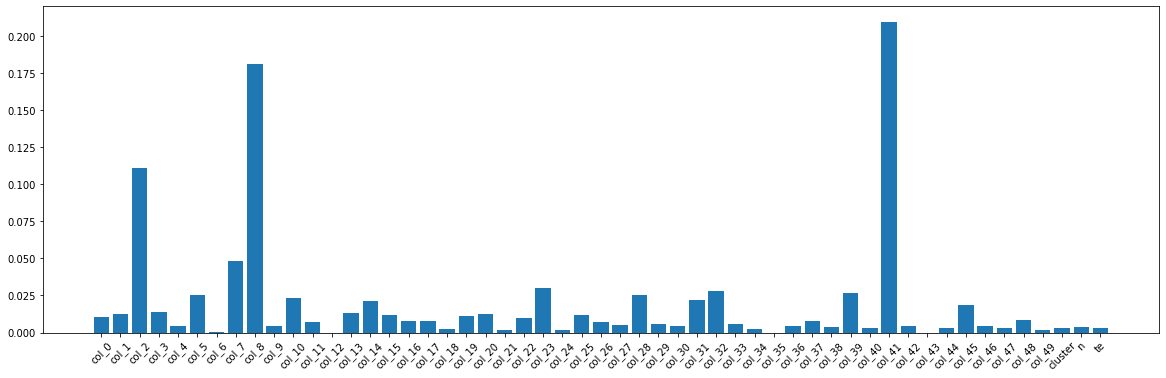

In [66]:
plt.figure(figsize=(20,6))
plt.bar(model.feature_names_in_, model.feature_importances_)
plt.xticks(rotation=45)
plt.show()